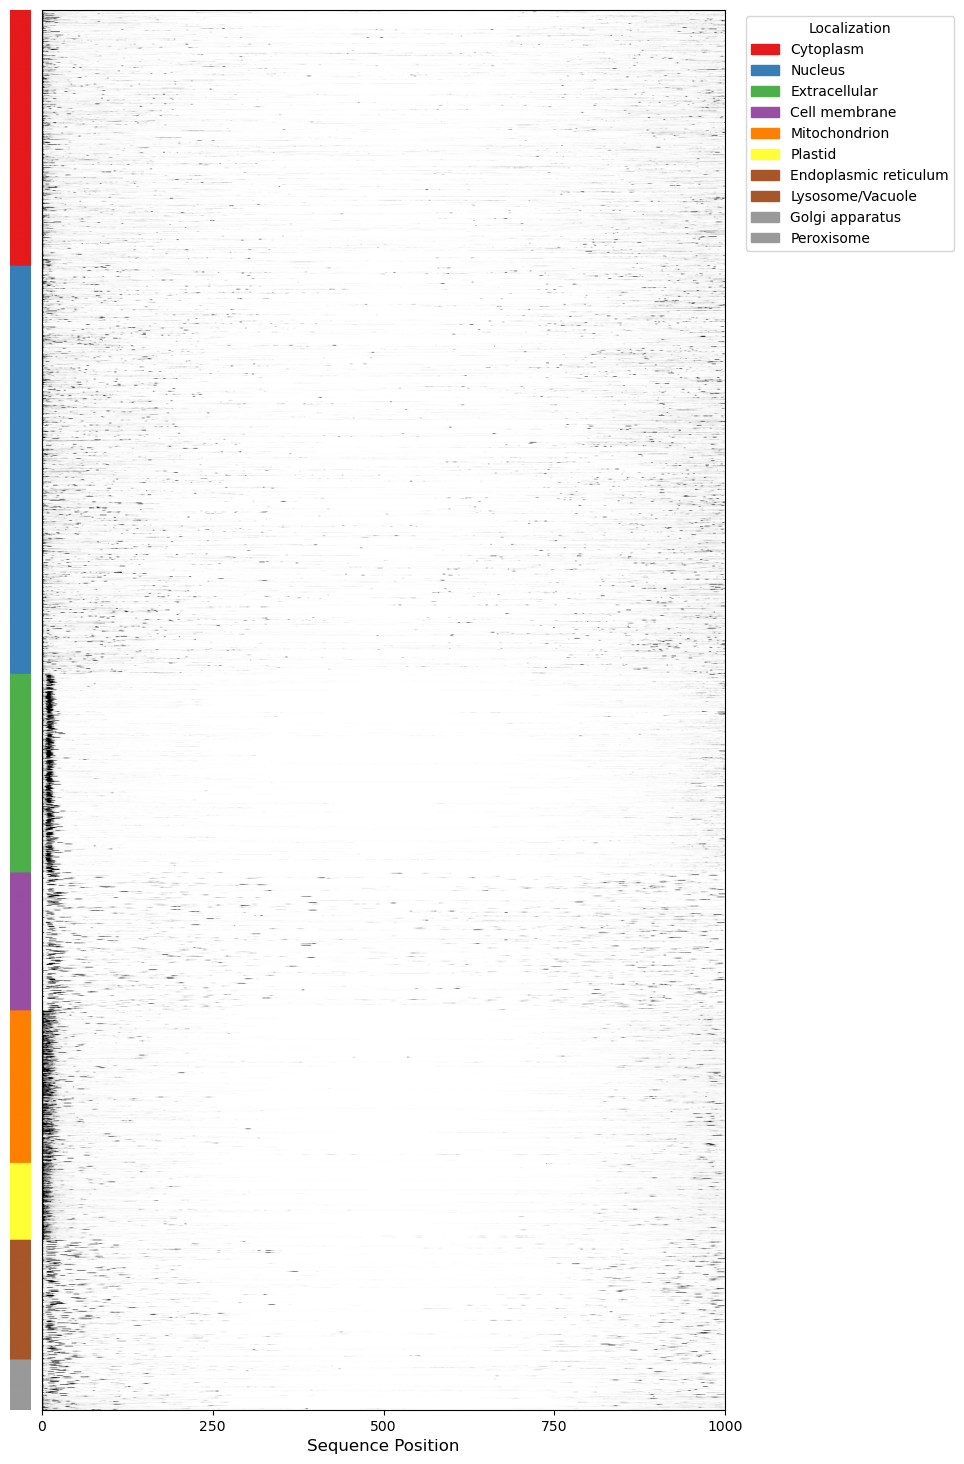

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

version = "DeepLoc1.0"

# === Load sorted data ===
alphas = np.load(f"results/{version}/attention_weights_sorted.npy")
targets = np.load(f"results/{version}/attention_labels_sorted.npy")

# === Sort data by target class ===
sort_idx = np.argsort(targets)
alphas_sorted = alphas[sort_idx]
targets_sorted = targets[sort_idx]

# === Class names and colormap ===
classes = [
    "Cytoplasm", "Nucleus", "Extracellular", "Cell membrane", "Mitochondrion",
    "Plastid", "Endoplasmic reticulum", "Lysosome/Vacuole", "Golgi apparatus", "Peroxisome"
]
cmap = plt.get_cmap("Set1", len(classes))
colors = [cmap(i) for i in range(len(classes))]

# === Plot ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15), gridspec_kw={"width_ratios": [0.3, 10]})

label_img = ax1.imshow(targets_sorted.reshape(-1, 1), cmap=cmap, vmin=0, vmax=len(classes)-1)
ax1.set_aspect('auto')
ax1.axis("off")

vmax = np.percentile(alphas_sorted, 99.5)  # rescale upper bound for better contrast as most weights in our attention weights are very small.
att_img = ax2.imshow(alphas_sorted, aspect='auto', cmap="binary", vmin=0, vmax=vmax)
ax2.yaxis.set_visible(False)

# X-axis ticks
max_len = alphas.shape[1]
tick_step = 250
ax2.set_xticks(np.arange(0, max_len + 1, tick_step))
ax2.set_xticklabels(np.arange(0, max_len + 1, tick_step))
ax2.set_xlabel("Sequence Position", fontsize=12)

# Legend
legend_handles = [Patch(color=colors[i], label=cls) for i, cls in enumerate(classes)]
ax2.legend(handles=legend_handles, bbox_to_anchor=(1.02, 1), loc="upper left", title="Localization", fontsize=10)

# Layout and save
plt.tight_layout(pad=2, w_pad=0.5, h_pad=1.0)
plt.savefig(f"results/{version}/attention_heatmap_deeploc1_style.png", dpi=300)
plt.show()
